# Lab 3

# Question 1: Read multiple images from folder/URLs 

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

In [3]:
# Question 1 Answer:

# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]  
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

# Question 2: Draw the following image using OpenCV 

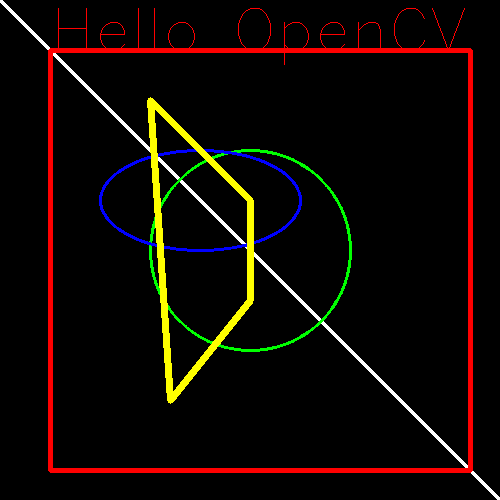

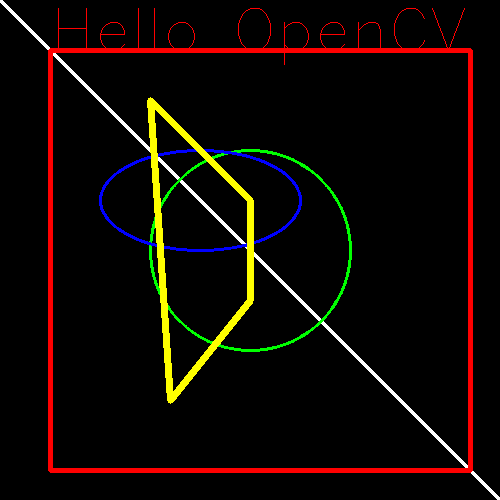

In [4]:
# Question 2 Answer:

# -*- coding: utf-8 -*-

#import opencv library
import cv2 as cv
import numpy as np


#create a black image (canvas) of black color
#using numpy zeros method for a zeros array
zeros_array = np.zeros((500,500,3), dtype="uint8")

#draw the line
#(0,0) is the startting point, (500, 500) is the ending point, (255,255,255) is the white color in 3 channels and 2 is the line thickness
img = cv.line(zeros_array, (0,0),(500,500),(255,255,255),2)

#draw the circle
#(250, 250) is the starting point, 100 is the radius and (0,255,0) is the blue line and 2 is the circle line thickenss...
img = cv.circle(img, (250,250),100,(0,255,0),2)

#draw the rectangle
#(50,50) is the top left corner and (470, 470) is the bottom right corner, (0,0,255) is the red line and 4 is the line thickness
img = cv.rectangle(img, (50,50),(470,470),(0,0,255),4)

#draw the ellipse
#(200,200) is the centre point, (100 is the diameter and 50 is the height), 0 is the angle, another 0 is the starting angle and 360 is the
#ending angle, (255,0,0) is the blue color and 2 is the line thickness
img = cv.ellipse(img, (200,200),(100,50),0,0,360,(255,0,0),2)

#draw the polygon i.e. will have any number of vertices
#1. Create a numpy array of vertices
#2. Change the shape of numpy array to -1,1,2
#3. Draw the polygon using these vertices
#[170,400],[150,100],[250,200],[250,300]] are vertices and all these are joined in Clockwise manner
vertices = np.array([[170,400],[150,100],[250,200],[250,300]], np.int32)
#vertices = vertices.reshape((-1,1,2))

#True indicates whether a closed ploygon or not; (0,255,255) is the color; 5 is the line thickness.
img = cv.polylines(img,[vertices],True,(0,255,255),5)

#write the text; (50,50) is the location; 2 is the font size and (0,0,255) is the color
img = cv.putText(img, 'Hello OpenCV', (50,50),cv.FONT_HERSHEY_SIMPLEX,2,(0,0,255))

#show the Geometric Shapes
cv2_imshow(img)


# Question 3: Explore other morphological operations like Dilation, Opening and Closing

In [ ]:
# Question 3 Answer:
#defining the dilation transformation i.e.. all the black noise is removed
trans_image = cv.dilate(img, trans_kernel, iterations=1)

#show the dilation Transformation
cv2_imshow(trans_image)

In [ ]:
# Question 3 Answer:
#define the opening transformation
trans_image = cv.morphologyEx(img,cv.MORPH_OPEN,trans_kernel)

#show the open Transformation
cv2_imshow(trans_image)

In [ ]:
# Question 3 Answer:
#define the closing transformation-Removes black noise-see the eye of elephant
trans_image = cv.morphologyEx(img,cv.MORPH_CLOSE,trans_kernel)

#show the close Transformation
cv2_imshow(trans_image)

# Question 4: Explore all other Geometric Operations like Translation, Flipping, Rotation and Cropping

In [ ]:
# Question 4 Answer:

#define the transformation matrix
trans_matrix = np.float32([[1,0,-50],[0,1,-25]])
#shifting the image
shifted_image = cv.warpAffine(img,trans_matrix,(img.shape[1],img.shape[0]))
#show the Shifted Image
cv2_imshow(shifted_image) #you could see the black part after shifting

In [ ]:
#Rotation
#define the transformation matrix
#(img.shape[1]//2,img.shape[0]//2) used for identifying the centre point and then rotating; 75 is the angle of rotation and 1 is the scaling factor
trans_matrix = cv.getRotationMatrix2D((img.shape[1]//2,img.shape[0]//2),75,1)
#To print the rotated image
rotated_image = cv.warpAffine(img,trans_matrix,(img.shape[1],img.shape[0]))
#show the rotated Image
cv2_imshow(rotated_image)

In [ ]:
#flipped images
flipped_image = cv.flip(img,1) # 1 is horizantal flipping
#show the Flipped Image
cv2_imshow(flipped_image)

flipped_image = cv.flip(img,0) # 0 is the vertical flipping
#show the Flipped Image
cv2_imshow(flipped_image)

flipped_image = cv.flip(img,-1) # 0 is the vertic
#show the Flipped Image
cv2_imshow(flipped_image)

In [ ]:
#Cropping

#do simple array slicing
cropped_image = img[60:200, 50:200]

cv2_imshow(cropped_image)

In [ ]:

#define the top hat transformation
trans_image = cv.morphologyEx(img,cv.MORPH_GRADIENT,trans_kernel)

#show the top hat Transformation
cv2_imshow(trans_image)



#define the top hat transformation
trans_image = cv.morphologyEx(img,cv.MORPH_TOPHAT,trans_kernel)

#show the top hat Transformation
cv2_imshow(trans_image)



#define the black hat transformation
trans_image = cv.morphologyEx(img,cv.MORPH_BLACKHAT,trans_kernel)

#show the black hat Transformation
cv2_imshow(trans_image)

# Question 5: Remove/Reduce the dots and improve the clarity

#Hint: Use smoothing techniques

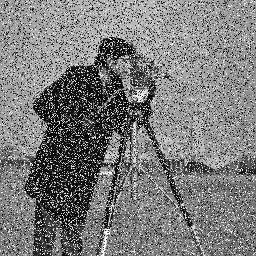

In [ ]:
#Question 5 Answer:
img = cv.imread('noisy_img.jpg')
cv2_imshow(img)

# perform median Blur filtering
result = cv.medianBlur(img,5)
cv2_imshow(result)



# Question 6: Explore other thresholding techniques like OTSU and Adaptive thresholding

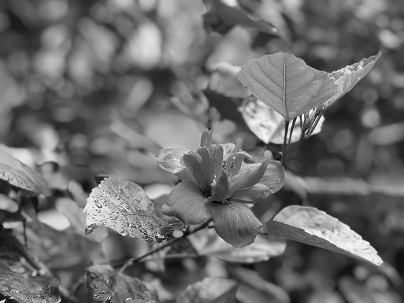

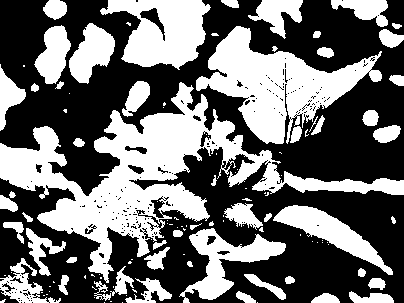

In [6]:
# Question 6 Answer:


# perform Otsu threshold

img = cv.imread('flower1.jpg',0)
cv2_imshow(img)

thresh,thresh_img = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
cv2_imshow(thresh_img) #leaves are shown in white and blur parts are made black

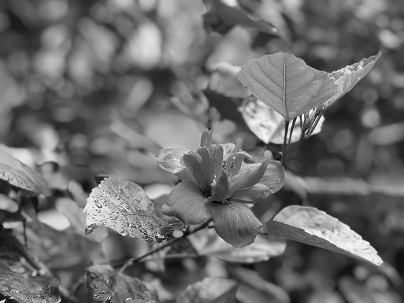

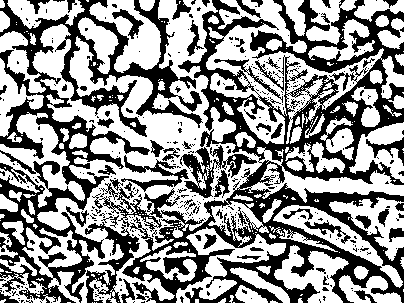

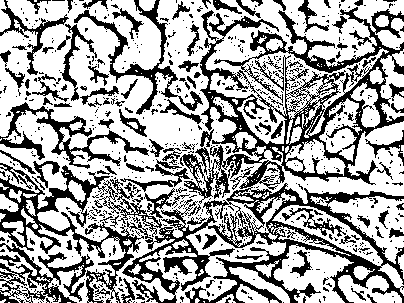

In [7]:
# Question 6 Answer:

#read the image from computer
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

img = cv.imread('flower1.jpg',0)
cv2_imshow(img)

# perform adaptive threshold
#255 is the maximum threshold value, 3rd argument-adaptive method, 11 is the block size and convolution
# operation is performed in this 11 X 11 subpart of the image and 2 is the constant,
thresh_img = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
cv2_imshow(thresh_img)

#Method is changed to Gaussian
thresh_img = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
cv2_imshow(thresh_img)

# Question 7: Perform Histogram Equalization and improve the clarity of the following image

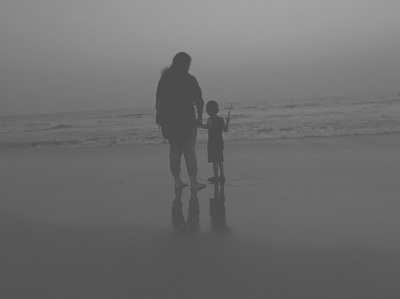

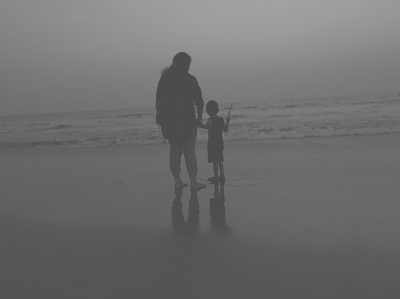

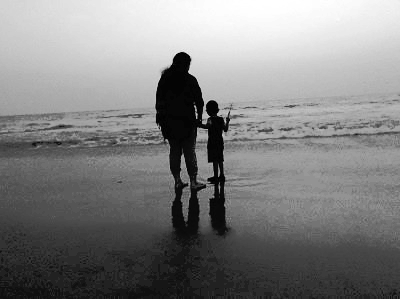

In [8]:
#Question 7 Answer:


#read the image from computer
img = cv.imread('beach.jpg',0)
cv2_imshow(img)

#perform equalization
corrected_img = cv.equalizeHist(img)
cv2_imshow(corrected_img)

# Question 8: Detect Contours  for the following image and display the count

# Also, try all the options in the following link:

https://learnopencv.com/contour-detection-using-opencv-python-c/

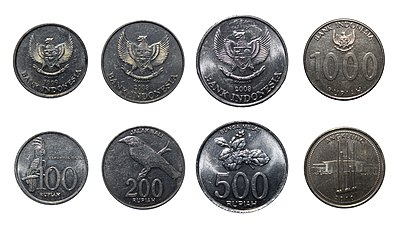

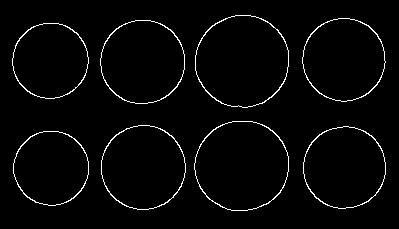

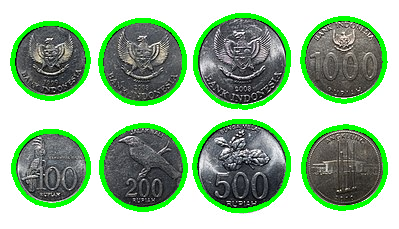

No of objects detected is 8


In [9]:
# Question 8 Answer:

#read the image from computer
img = cv.imread('rupiah.jpg')
img_original = img.copy()

#apply preprocessing, conver to gery, blur and threshold
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(img, (15, 15), 0)
img = cv.Canny(img, 30, 170)
thresh, thresh_img = cv.threshold(img, 127, 255, 0)

#pass pre-processed image, Contour retrieval mode and Contour approximation 
#Will return back Detected contours and hierarchy (containing information about the image topology)
contours, hierarchy = cv.findContours(thresh_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

#pass image, contours, contourIdx (-1 means all), color, thickness
#contours will be drawn on the image  passed, -1 is to find contours for all objects; 
cv.drawContours(img_original, contours, -1, (0,255,0), 3)

cv2_imshow(thresh_img)
cv2_imshow(img_original)

print('No of objects detected is {}'.format(len(contours)))


# Question 9: Do Face Detection using the above knowledge and Haar Cascade Classifer

In [ ]:
#they generally use haarcascade classifier function